In [483]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#df.describe()

In [ ]:
#df.shape

In [ ]:
#df.isnull().sum()/len(df)*100

In [ ]:
#df.info()

In [484]:
# Eliminamos duplicados
df.drop_duplicates(keep='first',inplace=True)

In [485]:
y = df['output']
X = df.drop(['output'], axis=1)

In [ ]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()  
#X_mm = scaler.fit_transform(X)


#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#x_std = scaler.fit_transform(X)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

from joblib import dump, load
dump(scaler, 'stdscaler.model') 

x_std = scaler.transform(X)

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()  
scaler.fit(X)

dump(scaler, 'mmcaler.model') 

x_mm = scaler.transform(X)

# Logistic Regression 

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x_std,
    y,
    test_size = 0.20,
    random_state = 42,
    stratify=y
    )

In [35]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

dump(log_reg, 'log_reg.model') 

['log_reg.model']

In [36]:
clf = load('log_reg.model') 
y_pred  = clf.predict(X_test)

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.787
Precision: 0.763
Recall: 0.879
F1 Score: 0.817


# Fuzzy c-means 

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x_std,
    y,
    test_size = 0.20,
    random_state = 42,
    stratify=y
    )

In [98]:
import skfuzzy as fuzz

n_centers = 2
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X_train.T, n_centers, 2, error=0.005, maxiter=1000, init=None)
print(cntr)
dump(cntr, 'fcmeans.cntr') 

[[-0.00395332  0.00681909 -0.02876892 -0.00664297 -0.04111678 -0.0212026
   0.04579862  0.01573425  0.03229063  0.0300403  -0.00443415  0.01632199
   0.05268757]
 [-0.01382125  0.00405    -0.02135897 -0.01098368 -0.04408849 -0.0233329
   0.05084419  0.02807488  0.02070004  0.01810907  0.00764393  0.00706138
   0.04480133]]


['fcmeans.cntr']

In [99]:
clf = load('fcmeans.cntr') 
clf

array([[-0.00395332,  0.00681909, -0.02876892, -0.00664297, -0.04111678,
        -0.0212026 ,  0.04579862,  0.01573425,  0.03229063,  0.0300403 ,
        -0.00443415,  0.01632199,  0.05268757],
       [-0.01382125,  0.00405   , -0.02135897, -0.01098368, -0.04408849,
        -0.0233329 ,  0.05084419,  0.02807488,  0.02070004,  0.01810907,
         0.00764393,  0.00706138,  0.04480133]])

In [100]:
u, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(X_test.T, clf, 2, error=0.005, maxiter=1000)

y_pred = np.argmax(u, axis=0)

In [101]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.721
Precision: 0.735
Recall: 0.758
F1 Score: 0.746


# KMeans

In [118]:
X_train, X_test, y_train, y_test = train_test_split(
    x_std,
    y,
    test_size = 0.20,
    random_state = 42,
    stratify=y
    )

In [119]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)

kmeans.fit(X_train)

dump(kmeans, 'kmeans.model') 

['kmeans.model']

In [120]:
clf = load('kmeans.model') 
y_pred  = clf.predict(X_test)

In [121]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.770
Precision: 0.721
Recall: 0.939
F1 Score: 0.816


# KNN

In [142]:
X_train, X_test, y_train, y_test = train_test_split(
    x_std,
    y,
    test_size = 0.20,
    random_state = 42,
    stratify=y
    )

In [207]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=2)

neigh.fit(X_train, y_train)

dump(neigh, 'neigh.model') 

['neigh.model']

In [208]:
clf = load('neigh.model') 
y_pred  = clf.predict(X_test)

In [209]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.738
Precision: 0.815
Recall: 0.667
F1 Score: 0.733


# Decision Trees

In [210]:
X_train, X_test, y_train, y_test = train_test_split(
    x_std,
    y,
    test_size = 0.20,
    random_state = 42,
    stratify=y
    )

In [238]:
from sklearn.tree import DecisionTreeClassifier

## Criterion: entropy or gini
classifier = DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state = 42) 
classifier.fit(X_train,y_train)

dump(classifier, 'tree.model') 

['tree.model']

In [239]:
clf = load('tree.model') 
y_pred  = clf.predict(X_test)

In [240]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.836
Precision: 0.780
Recall: 0.970
F1 Score: 0.865


# Naive Bayes

In [261]:
X_train, X_test, y_train, y_test = train_test_split(
    x_std,
    y,
    test_size = 0.20,
    random_state = 42,
    stratify=y
    )

In [267]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()

classifier.fit(X_train, y_train)

dump(classifier, 'nb.model') 

['nb.model']

In [268]:
clf = load('nb.model') 
y_pred  = clf.predict(X_test)

In [269]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.820
Precision: 0.789
Recall: 0.909
F1 Score: 0.845


# Random Forest

In [270]:
X_train, X_test, y_train, y_test = train_test_split(
    x_std,
    y,
    test_size = 0.20,
    random_state = 42,
    stratify=y
    )

In [358]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10, random_state=42)
clf.fit(X_train, y_train)

dump(clf, 'forest.model') 

['forest.model']

In [359]:
clf = load('forest.model') 
y_pred  = clf.predict(X_test)

In [360]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.803
Precision: 0.769
Recall: 0.909
F1 Score: 0.833


# All together

In [390]:
X_train, X_test, y_train, y_test = train_test_split(
    x_std,
    y,
    test_size = 0.20,
    random_state = 42,
    stratify=y
    )

In [391]:
log_reg = load('log_reg.model') 
y_lr  = log_reg.predict(X_test)

kmeans = load('kmeans.model') 
y_km  = kmeans.predict(X_test)

neigh = load('neigh.model') 
y_nb  = neigh.predict(X_test)

tree = load('tree.model') 
y_tree  = tree.predict(X_test)

nb = load('nb.model') 
y_bayes  = nb.predict(X_test)

forest = load('forest.model') 
y_forest  = forest.predict(X_test)

cntr = load('fcmeans.cntr') 
u, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(X_test.T, cntr, 2, error=0.005, maxiter=1000)
y_fuzzy = np.argmax(u, axis=0)

In [396]:
from statistics import mode

y_pred = []

for i in range(len(y_test)):
    
    r = mode([y_lr[i], y_fuzzy[i], y_km[i], y_nb[i], y_tree[i], y_bayes[i], y_forest[i]])
    
    y_pred.append(r)

In [397]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.787
Precision: 0.750
Recall: 0.909
F1 Score: 0.822


In [402]:
prueba = X[0:1].values

scaler = load('stdscaler.model') 
x_std = scaler.transform(prueba)

log_reg = load('log_reg.model') 
y_lr  = log_reg.predict(x_std)

kmeans = load('kmeans.model') 
y_km  = kmeans.predict(x_std)

neigh = load('neigh.model') 
y_nb  = neigh.predict(x_std)

tree = load('tree.model') 
y_tree  = tree.predict(x_std)

nb = load('nb.model') 
y_bayes  = nb.predict(X_test)

forest = load('forest.model') 
y_forest  = forest.predict(X_test)

cntr = load('fcmeans.cntr') 
u, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(x_std.T, cntr, 2, error=0.005, maxiter=1000)
y_fuzzy = np.argmax(u, axis=0)

r = [y_lr[0], y_fuzzy[0], y_km[0], y_nb[0], y_tree[0], y_bayes[0], y_forest[0]]

C:\Users\ppadr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Plot

In [498]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)

from umap import UMAP
reducer = UMAP()
reducer.fit(X)

from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2)
tsne.fit(X)

dump(pca, 'pca.dim') 
dump(reducer, 'umap.dim')
dump(tsne, 'tsne.dim')

C:\Users\ppadr\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ppadr\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


['tsne.dim']

In [499]:
pca = load('pca.dim')
X_pca  = pca.transform(X)
umap = load('umap.dim')
X_embedded  = umap.transform(X)
tsne = load('tsne.dim')
embedding  = tsne.fit_transform(X)

C:\Users\ppadr\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ppadr\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [500]:
from umap import validation

K = 30

numerical_trustworthiness = validation.trustworthiness_vector(
    source=X.values,
    embedding=X_embedded,
    max_k=K)

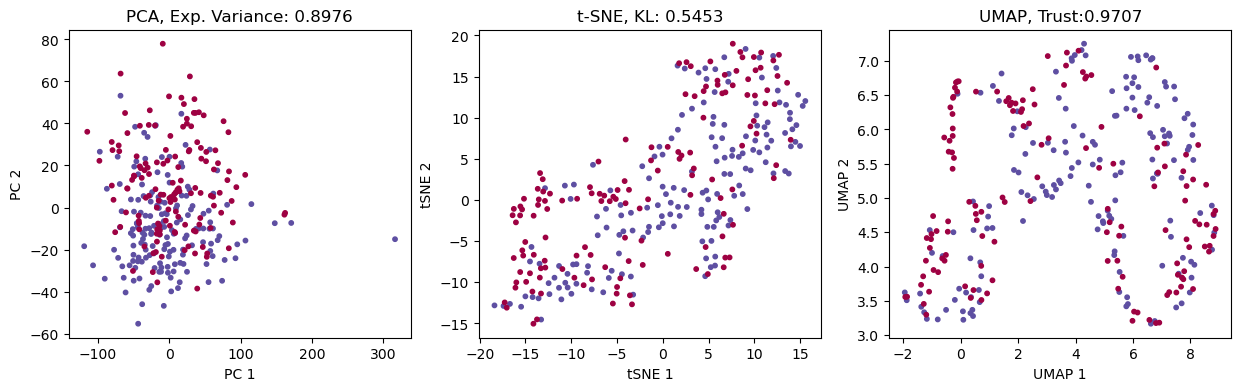

In [501]:
fig = plt.figure(figsize=(15,4))

# PCA
plt.subplot(131)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y, cmap = plt.cm.Spectral, s =  10)
plt.title(f"PCA, Exp. Variance: {np.round(np.sum(pca.explained_variance_ratio_), 4)}")
plt.xlabel("PC 1")
plt.ylabel("PC 2")

# t-SNE
plt.subplot(132)
plt.scatter(embedding[:, 0], embedding[:, 1], c = y, cmap = plt.cm.Spectral, s =  10)
plt.title(f"t-SNE, KL: {np.round(tsne.kl_divergence_, 4)}")
plt.xlabel("tSNE 1")
plt.ylabel("tSNE 2")

# UMAP
plt.subplot(133)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c = y, cmap = plt.cm.Spectral, s =  10)
plt.title(f"UMAP, Trust:{np.round(numerical_trustworthiness.mean(), 4)}")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")

plt.show();

In [502]:
dump(fig, 'dime.fig') 

['dime.fig']

In [503]:
r = load('dime.fig')

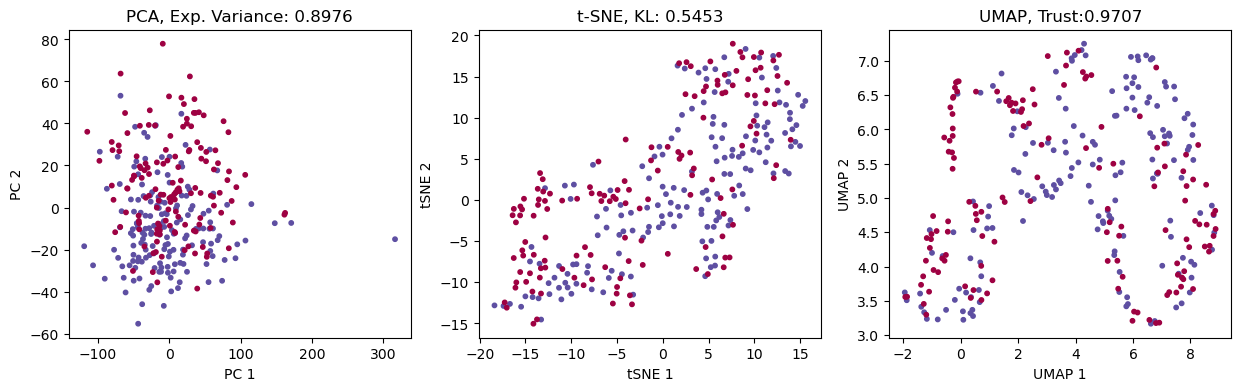

In [504]:
r

# Plot user

In [524]:
dump(X_pca, 'X_pca.data')
X_pca = load('X_pca.data')

dump(y, 'y.data')
y = load('y.data')

C:\Users\ppadr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'PC 2')

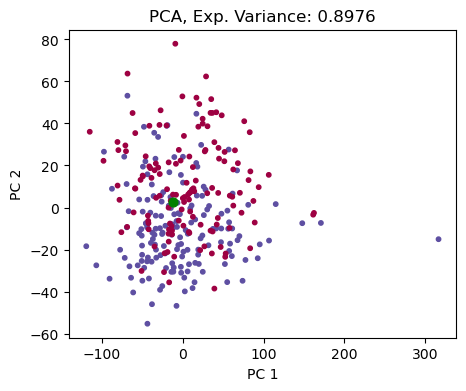

In [523]:
prueba = X[0:1].values

pca = load('pca.dim')
u_pca  = pca.transform(prueba)


fig = plt.figure(figsize=(5,4))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y, cmap = plt.cm.Spectral, s =  10)
plt.scatter(u_pca[:, 0], u_pca[:, 1], c = 'g', cmap = plt.cm.Spectral, s =  40)
plt.title(f"PCA, Exp. Variance: {np.round(np.sum(pca.explained_variance_ratio_), 4)}")
plt.xlabel("PC 1")
plt.ylabel("PC 2")

